# BIDS 5
# Implementing K-Means Clustering, Hierarchal Clusering, and K Nearest Neighbors in Python with Scikit-Learn

Today we will implement unsupervised clustering methods K-means and HCC. Lastly we will implement a supervised Machine learning method KNN.

## Learning Outcomes: 
1) Implement K-Means, HCC, and KNN using the popular python library sklearn https://scikit-learn.org/stable/
2) Interpret the results to learn about the data structure 
3) Visualise the clustering results 

### Importing packages
You should have `numpy`, `pandas`, `matplotlib` and `sklearn` installed from the previous session

## Dataset
In this turorial we will aim to predict the occourence of COVID-19. 
We will only work with this classification. After following along with this tutorial, try to implement a regression problem with the same KNN class we created.


In [1]:
# Use pandas to load the data
import pandas as pd ## pandas creates data frames/ data tables similar to an excel file, although most python functions like the fromat of a numpy array
import numpy as np ### for working with numpy arrays 

# Load the data
df = pd.read_csv('/home/kl2418/Documents/Tutorial_BIDS/ClassificationRegression1/COVID19_Proteaomics.csv', index_col=0) ## path to file 
# View the first 5 records to see what features we have in our dataset
df.head()

,COVID19,sample_time,sample_id,"lectin, galactoside-binding, soluble, 9","tumor necrosis factor receptor superfamily, member 10a",agouti related protein homolog (mouse),"tumor necrosis factor receptor superfamily, member 10b","tumor necrosis factor receptor superfamily, member 13B",c-fos induced growth factor (vascular endothelial growth factor D),dickkopf WNT signaling pathway inhibitor 1,...,"EGF-like-domain, multiple 7",REST corepressor 1,carbonic anhydrase XIV,syntaxin 8,"protein kinase, AMP-activated, beta 1 non-catalytic subunit",mitogen-activated protein kinase kinase kinase kinase 5,negative regulator of ubiquitin-like proteins 1,ectonucleoside triphosphate diphosphohydrolase 2,"melanoma antigen family D, 1",G protein-coupled receptor 56
1,0,0,1010823,9.467005,3.150612,4.76586,5.853070,9.776093,8.076783,10.286002,...,5.089420,1.904315,2.354585,3.370510,1.457120,6.393335,1.888595,1.272365,-1.015575,1.774740
2,0,0,1027114,2.414755,1.457353,1.24416,0.712265,2.301213,0.910362,-0.073302,...,5.737120,1.706265,2.174810,2.320480,0.754500,3.058775,0.745930,1.413305,-1.683045,1.542735
3,0,0,1029090,9.581175,3.121713,4.64925,5.796290,9.494383,8.618412,9.356512,...,5.046855,1.923825,2.362200,3.534835,1.649450,5.595935,2.099020,1.539440,-0.599360,1.543860
4,0,0,1049423,9.391395,3.068790,4.66992,5.773255,11.887820,7.702655,9.278815,...,4.665445,1.910215,2.364895,3.594625,1.468635,5.781550,1.864265,1.657420,-0.094040,1.229660
5,0,0,1057525,9.142025,3.198663,5.43008,5.614800,9.746692,8.250982,9.407002,...,5.510625,1.770395,2.533960,3.393515,1.293010,5.925985,1.124380,1.383710,-0.680310,1.763090


As you can see this data set in its current format is not suitable for our alogirthms. 
In python column indices start from 0, we want to select only the proteaomics colulmns for feature scaling. 

We want to predict COVID19 (column 0 ) using columns 3:453

As we can see, the data is now in the proper format for our KNN models.

Now that out data has been pre-processed, we can seperate the target from the fetures.

In [2]:
# Create feature matrix and target vector
X = df.iloc[:,4:]
y = df['COVID19']

In order to test our alogrithms we need to set aside some of the data we have. This is practice for machine learning models. We will use 80% of our data to train our model, and the remaining 20% will be used to test the performance of our model. 

Scikit-Learn has a function train_test_split to easily do this for us.

In [3]:
# Import train-test split
from sklearn.model_selection import train_test_split

# Split the df into 80% train 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=42)

Our data has been cleaned and split into training and testing features and targets. We have one last pre-processing step to take before being able to run our data: scaling. As we mentioned before, KNN makes predictions based on distances between data points. As such, it is crucial that all of the data it is comparing is on the same scale. In our Proteaomics data, most of the data is continuous. We will scale the data using the StandardScaler() shown in the previous tutorials. 

When scaling your data you want to fit the model to your training data, and only transform your testing data. 

In [4]:
# Normalize Data
from sklearn.preprocessing import StandardScaler

# Instantiate scaler model
scaler = StandardScaler()

# Fit and Transform X_train
X_train = scaler.fit_transform(X_train)

# Transform X_test
X_test = scaler.transform(X_test)

## K-Means Clustering

In [5]:
from sklearn.cluster import KMeans

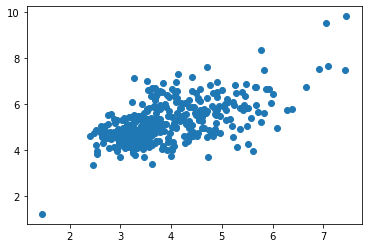

In [6]:
from matplotlib import pyplot as plt
plt.scatter(X.iloc[:,0], X.iloc[:,1]) ### plotting first two proteaomics features

In [7]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0) ### kmeans clustering 
kmeans.fit(X) ## fit on X and define the random state

KMeans(n_clusters=3, random_state=0)

## How do we pick the number of cluster? 
K-means clustering requires that the number of cluters are predfined, however when predifining n_clusters we would want justify how many clusters are optimal. We can treat n_clusters as a hyperparamater and for loop through several number of clusters. To select the best number of clusters we will implement the elbow method, where we train multiple models using a different number of clusters and storing the value of the intertia_ property, Within Cluster Sum of Squares (WCSS) every time.



WCSS is defined as the sum of the squared distance between each member of the cluster and its centroid.

In [8]:
wcss = [] ### create a list 

for i in range(2, 12): ## loop through n_clusters 2:11
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_train) ## fit on X and define the random state
    wcss.append(kmeans.inertia_)

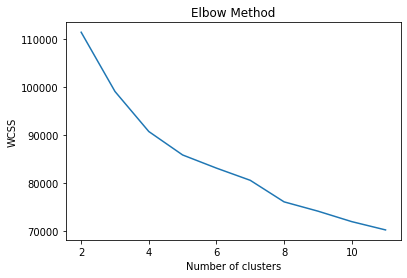

In [9]:
plt.plot(range(2, 12), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

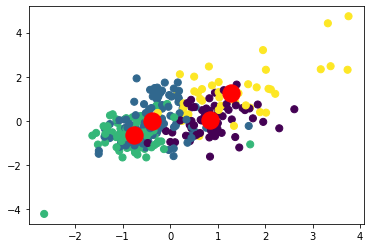

In [10]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_train)
plt.scatter(X_train[:,0], X_train[:,1], c=pred_y, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

It looks like there are 4 clusters at the shapest elbow point. However, when plotting just the first two proteaomics feautures it is not clear and their is overlap of the clusters. 
However, we can use alternative methods to visualise these clusters. One of these is PCA from the previous tutorial

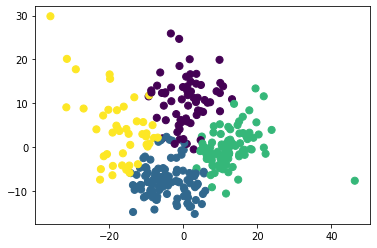

In [11]:
from sklearn.decomposition import PCA, SparsePCA, KernelPCA
pca = PCA(n_components=4)
pca_covid = pca.fit_transform(X_train)
# run PCA with 4 components
# plot a scatterplot using seaborn
# the x axis will contain the first column of the pca scores x=pca_covid[:, 0]
plt.scatter(pca_covid[:, 0], pca_covid[:, 1], c=pred_y, s=50, cmap='viridis')
plt.show()

You can also do this with the Kernel PCA, sparse PCA, TSNE, UMAP etc.

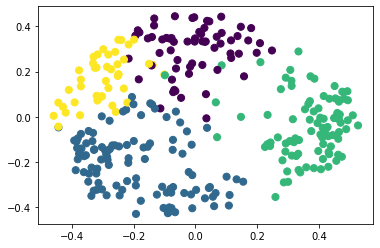

In [12]:
# no kernel has been specified so it uses linear by default
kernel_pca = KernelPCA(n_components=4, kernel='rbf') ### can tweak the kernel to one of: ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘cosine’, ‘precomputed’}, default=’linear’
kernel_pca_covid = kernel_pca.fit_transform(X_train)
plt.scatter(kernel_pca_covid[:, 0], kernel_pca_covid[:, 1], c=pred_y, s=50, cmap='viridis')
plt.show()

## Hierarchical Clustering (HCC)

This is similar to K-means although this time we wil use the "AgglomerativeClustering" function

In [13]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit(X_train)
labels = cluster.fit_predict(X_train)

In [14]:
from sklearn.metrics import silhouette_score, silhouette_samples
silhouette_score(X_train,labels,metric="euclidean",sample_size=1000,random_state=200)

0.16058749174430298

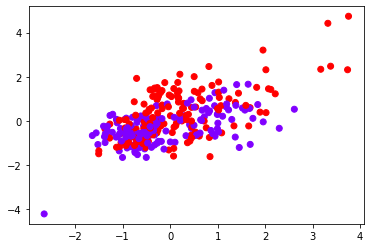

In [15]:
## visualsie as a scatter plot 
plt.scatter(X_train[:,0],X_train[:,1], c=cluster.labels_, cmap='rainbow')

### Like in the K-means appraoch defining the optimal number of clusters requires a some itteration of n_clusters. This time we will implement the silhouette method

The same challenge occours, where we need to define the n_clusers. This time we will use the silhoute score to detemine optimal number of clusters. The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The value of the silhouette ranges between [1, -1], where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

In [16]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from matplotlib.colors import colorConverter
%matplotlib inline

In [17]:
## Silhoutte plot function no need to change this it's a custom function to obtain silhouete plots
def silhouette_plot(X, y, n_clusters):
    from sklearn.metrics import silhouette_samples, silhouette_score

    # Compute the silhouette scores for each sample
    silhouette_avg = silhouette_score(X, y)
    sample_silhouette_values = silhouette_samples(X, y)

    y_lower = padding = 2
    for i in range(n_clusters):
        ax = plt.gca()
        # Aggregate the silhouette scores for samples belonging to
        ith_cluster_silhouette_values = sample_silhouette_values[y == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0,
                         ith_cluster_silhouette_values,
                         facecolor=color,
                         edgecolor=color,
                         alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i + 1))

        # Compute the new y_lower for next plot
        y_lower = y_upper + padding
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax.axvline(x=silhouette_avg, c='r', alpha=0.8, lw=0.8, ls='-')
    ax.annotate('Average',
                xytext=(silhouette_avg, y_lower * 1.025),
                xy=(0, 0),
                ha='center',
                alpha=0.8,
                c='r')

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    ax.set_ylim(0, y_upper + 1)
    ax.set_xlim(-0.075, 1.0)
    plt.figure()
    return ax

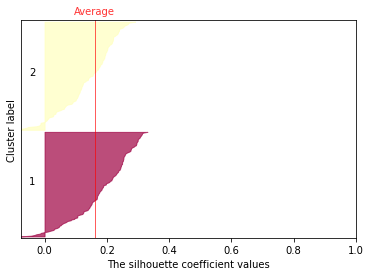

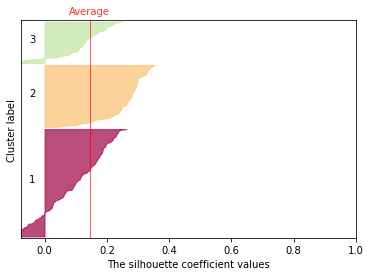

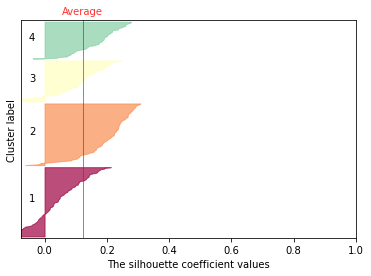

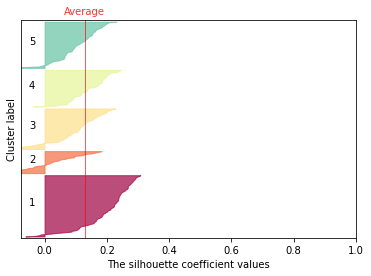

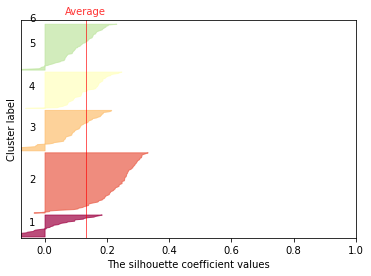

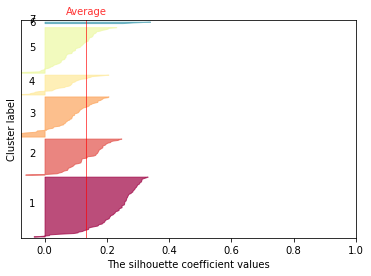

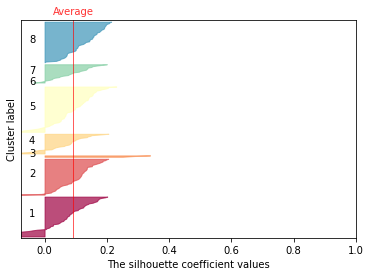

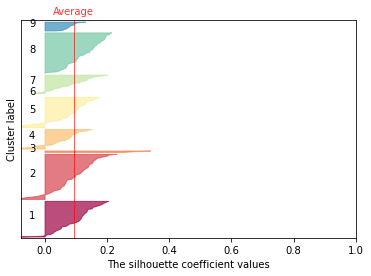

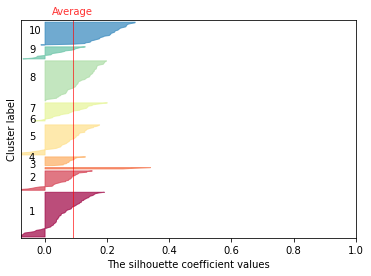

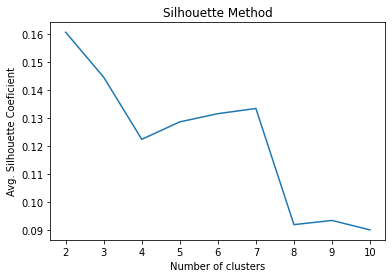

In [18]:
silho = [] 
for i in range(2,11):
    # Run the HCC algorithm
    cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
    cluster.fit(X_train)
    labels = cluster.fit_predict(X_train)
    silhouette_plot(X_train, labels, n_clusters=i)
    silho.append(silhouette_score(X_train,labels,metric="euclidean",sample_size=1000,random_state=200))
plt.plot(range(2, 11), silho)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Avg. Silhouette Coeficient')
plt.show()    

Here we can see that the optimal K (the one with the highest average Silhoutte coeficient) is 2. However, often averages can be deceiving (e.g very low coeficints averages with extermely high coefcients). With the silhouette method it is a good idea to examing the coeficients of each sample in each cluster independently as well.

As we did with the k-means approach we can also visualise these clusters, as a scatter plot, using various techniques. 

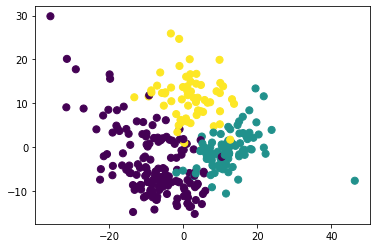

In [19]:
### edit this to show the two clusters
from sklearn.metrics import silhouette_score, silhouette_samples
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit(X_train)
labels = cluster.fit_predict(X_train)
pca = PCA(n_components=4)
pca_covid = pca.fit_transform(X_train)
# run PCA with 4 components
# plot a scatterplot using seaborn
# the x axis will contain the first column of the pca scores x=pca_covid[:, 0]
plt.scatter(pca_covid[:, 0], pca_covid[:, 1], c=labels, s=50, cmap='viridis')
plt.show()

One of the renowned methods of visualization for hierarchical clustering is using dendrogram

In [20]:
### this helper function is required no need to edit this, You may need to also install scipy
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

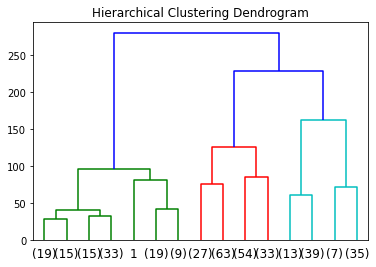

In [21]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)

## K-Nearest Neighbours (KNN)

## Scikit-Learn's KNN 


Let's apply the KNN algorithm to a Covid-19 Proteamocs Data set

### Theory Recap (Optional)
K Nearest Neighbors is a simple machine learning model that makes predictions based off of the most similar observations in its traing data. While it can be very powerful, its predictive capability is limited to observations that are similar to what the training data it has in memory.

Unlike most other models, KNN does not 'learn' from its training dataset. Instead it holds the entire training set in memory and then compares the new observation to its stored data. KNN performs no work until a prediction is required.

When a prediction is required it does exactly what it name says. The model examines the new observation and finds the most similar records (nearest neighbors) that it holds in its training set. The number of neighbors (k) the model selects from its training data is defined by the user. 

A prediction can be made by either returning the most common outcome (classification) or by taking the average (regression).

**Some Important Notes on Using KNN**

- KNN is a simple model to implement, but as a result it is limited in the types of data it can take as input. When working with KNN the phrase "garbage in, garbage out" is never more accurate. KNN does not handle categorical variables so everything must be pre-processed to include numerical values only. Additionally, as you will see in the next section, the nearest neighbors are found by calculating the distances between the new observation and the records held in memory. Those with the smallest distances are considered most similar. Intuatively, you should understand the importance of scaling your data (so that they are all being measured on the same metric) before running a KNN model. 

If you have kept with us this far, it is about to pay off, it's time to run some models!

## Baseline Accuracy

When evaluating model performance we want to start with a baseline accuracy. This is the accuracy score if we were to simply guess the majority outcome everytime. It gives us a starting point to compare our models to. The baseline metric is the best we can do without models. Hopefully, our models can improve over the baseline.

In [22]:
# Calculate the baseline accuracy

# Find the majority count
y_train.value_counts()

1    216
0     89
Name: COVID19, dtype: int64

In [23]:
# Survival counts for y_test
y_test.value_counts()

1    42
0    35
Name: COVID19, dtype: int64

In [24]:
# If we were to guess the majority (0) for each test, we would get 42 correct
# baseline is correct guesses divided by total guesses 
baseline = 42 / (42 + 35)
baseline

0.5454545454545454

### COVID Predictions Using Scikit-Learn's KNeighborsClassifier

Let's start by making predictions and calculating the accuracy of Scikit-Learn's KNeighborsClassifier model.

This can be done by the following steps:

- Instantiate the model
- Fit the model with our training data
- Make predictions based off of our test features
- Provide the known test targets to determine the accuracy

In [25]:
# Import the model
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the KNClassifier object
scikit_KNN = KNeighborsClassifier(n_neighbors=11)

# Fit the model with training data
scikit_KNN.fit(X_train, y_train)

# Make predictions
print(scikit_KNN.predict(X_test))

# Calculate accuracy
scikit_KNN.score(X_test, y_test)


[1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1
 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1
 0 1 0]


1.0

In [26]:
## Accuracy is one perfomrance metric here we will defeine several alternative metrics 

def modelPerformance(confMat):
    TN = confMat[0, 0]
    TP = confMat[1, 1]
    FP = confMat[0, 1]
    FN = confMat[1, 0]
    prec = TP / (TP + FP)
    rec = TP / (TP + FN)
    spec = TN / (TN + FP)
    fpr = FP / (TN + FP)
    f1 = 2 * (prec * rec) / (prec + rec)
    acc = (TP + TN) / (TP + FP + TN + FN)
    return (acc, prec, rec, spec, fpr, f1)

def printPerformance(confMat):
    acc, prec, rec, spec, fpr, f1 = modelPerformance(confMat)
    print("Accuracy = " "%.4f" % acc)
    print("Precision = " "%.4f" % prec)
    print("Recall = " "%.4f" % rec)
    print("Specificity = " "%.4f" % spec)
    print("False positive rate = " "%.4f" % fpr)
    print("F1-score = " "%.4f" % f1)
    np.set_printoptions(precision=2)
    print("Confusion matrix (%):")
    print(confMat/np.sum(confMat)*100)

In [27]:
from sklearn import metrics
y_test_hat = scikit_KNN.predict(X_test)
cmat = metrics.confusion_matrix(y_test, y_test_hat)
printPerformance(cmat)

Accuracy = 1.0000
Precision = 1.0000
Recall = 1.0000
Specificity = 1.0000
False positive rate = 0.0000
F1-score = 1.0000
Confusion matrix (%):
[[45.45  0.  ]
 [ 0.   54.55]]


Considering the baseline accuracy was 54%, Scikit-Learn's model is an improvement at 98.7%

### What's Next?
We have walked through how to implement a K Nearest Neighbors machine learning algorithm that will work with either classification or regression problems. Then we walked through a classification problem using the COVID-19 Proteomics dataset. 

For further understanding and practice:
- Cluster a different data set using HCC and K-means
- Use a different dataset for a regression problem and use the predict_regression() method that we created in our KNN class.
- Implement different distance metrics like Manhattan distance or Hamming distance
- Implement different error metrics for both classification and regression


